Данный тип кластеризации использует собственные значения (спектр) матрицы сходства данных, чтобы снизить размерность данных и далее провести кластеризацию.

Алгоритм спектральной кластеризации состоит из **четырёх шагов**:

**На первом** шаге мы создаём граф, количество вершин которого равняется количеству объектов в датасете.

После этого проводим некоторые математические преобразования этой матрицы. Это нужно для того, чтобы далее мы могли описать вершину графа не **шестью признаками, а всего одним**:

Далее уменьшаем размерность данных.

Далее проводим кластеризацию матрицы с **уменьшенной размерностью**

### ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ СПЕКТРАЛЬНАЯ КЛАСТЕРИЗАЦИЯ?

Данный метод широко используется для сегментации изображений. В данном случае вершины графа — это пиксели изображения.

Например, если у нас есть зашумлённая картинка (ниже слева), на которой нужно сегментировать изображение и выделить разные кластеры, то спектральная кластеризация отлично подойдёт для такой задачи. Результаты сегментации можно наблюдать на картинке справа:

![alt](https://lms.skillfactory.ru/assets/courseware/v1/06144a25eddf97a09132a4b461dc4cdd/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_29.png)

При желании вы можете [повторить этот эксперимент](https://scikit-learn.org/stable/auto_examples/cluster/plot_segmentation_toy.html#sphx-glr-auto-examples-cluster-plot-segmentation-toy-py) самостоятельно.

### КАК ЗАПУСТИТЬ СПЕКТРАЛЬНУЮ КЛАСТЕРИЗАЦИЮ?

Рассмотрим это на нашем примере датасета с покемонами:

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

pokemon = pd.read_csv('data/pokemon.csv')


In [8]:
# вызываем из sklearn SpectralClustering 
from sklearn.cluster import SpectralClustering


# запускаем кластеризацию, задав количество кластеров, равное 3 
spectral_clustering = SpectralClustering(n_clusters=3, random_state=42)

spectral_clustering.fit(pokemon[['Attack', 'Defense']])
# получаем результаты кластеризации
spectral_predictions = spectral_clustering.labels_

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

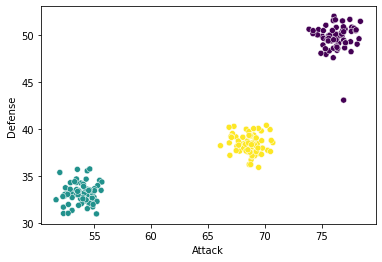

In [9]:
sns.scatterplot(x=pokemon['Attack'], y=pokemon['Defense'], c=spectral_predictions)

**Основные параметры SpectralClustering**:

**n_clusters** — количество кластеров; по умолчанию — 8.

random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску необходимо передать какое-то число.

Как мы можем заметить, спектральная кластеризация так же, как и другие типы кластеризации, не справляется с выбросами и не выделяет их в отдельный кластер. К сожалению, этот недостаток алгоритма нельзя исправить.

### ПРЕИМУЩЕСТВА И НЕДОСТАТКИ СПЕКТРАЛЬНОЙ КЛАСТЕРИЗАЦИИ
**Преимущества**

Подходит для кластеризации данных с большим количеством признаков, так как использует технику понижения размерности.

Эффективна для кластеризации разрежённых данных.
Хорошо работает на практически любых распределениях данных. На рисунке ниже представлены результаты кластеризации данных с разным распределением признаков:

![alt](https://lms.skillfactory.ru/assets/courseware/v1/fb4dd3e3c7d751b63b1e610cbaf50d15/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_32.png)


Алгоритм показал хорошие результаты во всех случаях, за исключением данных в форме вытянутого эллипса (столбец 3).

**Недостатки**

Нужно заранее задавать количество кластеров.
Подходит для задач сбалансированной классификации, то есть количество точек между кластерами не сильно отличается.

